In [ ]:
#opening csv files
GDP <- read.csv("GDP.csv")
HDI <- read.csv("HDI.csv")

In [ ]:
#observing the data of the csv files, the first and last lines
head(GDP)
str(GDP)
tail(GDP)
#analysing the HDI file
head(HDI)
str(HDI)
tail(HDI)

In [ ]:
#sorting the files by province
GDPs <- GDP[order(GDP$Province), ]

HDIs <- HDI[order(HDI$Province), ]
#joining the tables
joined_table <- cbind(GDPs,HDIs)
joined_table

#removing province column because is duplicated
mod_table = joined_table[,-4]
mod_table

In [ ]:
# we are validating that everything is correct
head(mod_table)
tail(mod_table)

In [ ]:
#creating a scatter plot with geom_point
library(ggplot2)
ggplot(mod_table, aes(x=GDP.per.capita, y=HDI, color=CCAA)) +
geom_point(size = 5) + theme(text = element_text(family = "Calibri", size = 10, face = "bold"))

In [ ]:
#creating a scatter plot with geom.text()
ggplot(mod_table, aes(x=GDP.per.capita, y=HDI, color=CCAA)) +
geom_text(aes(label=Province), check_overlap=T, size = 8) + 
    theme(text = element_text(family = "Calibri", size = 50, face = "bold"))
# Allow the plot to be bigger
options(repr.plot.width = 30, repr.plot.height = 20, repr.plot.res = 50)

In [ ]:
#We are going to calculate the mean and standard deviation
mean_HDI <- aggregate(mod_table$HDI, list(mod_table$CCAA), mean)
colnames(mean_HDI) <- c("CCAA", "Media HDI")

mean_GDP <- aggregate(mod_table$GDP.per.capita, list(mod_table$CCAA), mean)
colnames(mean_GDP) <- c("CCAA", "Media GDP")

mean_HDI
mean_GDP

In [ ]:
#we are going to obtain the standard deviation 
standard_GDP <- aggregate(mod_table$GDP.per.capita, list(mod_table$CCAA), sd)
colnames(standard_GDP) <- c("CCAA", "SD_GDP")

standard_HDI <- aggregate(mod_table$HDI, list(mod_table$CCAA), sd)
colnames(standard_HDI) <- c("CCAA", "SD_HDI")

standard_GDP
standard_HDI

In [ ]:

#creting a mean and sd table 
table1 <- cbind(mean_GDP,mean_HDI)
table1<- table1[,-3]
table1

table2 <- cbind(standard_GDP,standard_HDI)
table2 <- table2[,-3]
table2

In [ ]:
#now we joined both tables(mean_table and sd_table) and we remove the dupicated column
table_mean_sd = cbind(table1,table2)[,-4]
table_mean_sd

In [ ]:
#replacing the NAs with zeros
table_mean_sd[is.na (table_mean_sd)]=0
table_mean_sd

In [ ]:
#a scatter plot with geom_point,again.
library(ggplot2)
ggplot(mod_table, aes(x=GDP.per.capita, y=HDI, color=CCAA)) +
geom_point(size = 10) + theme(text = element_text(family = "Calibri", size = 40, face = "bold"))

In [ ]:
#adding new 
ggplot(mod_table, aes(x=GDP.per.capita, y=HDI, color=CCAA)) +
geom_point(size=10) + theme(text = element_text(family = "Calibri", size = 40, face = "bold")) + geom_point(data=table_mean_sd, x=table_mean_sd[,2], y=table_mean_sd[,3], size=20) 


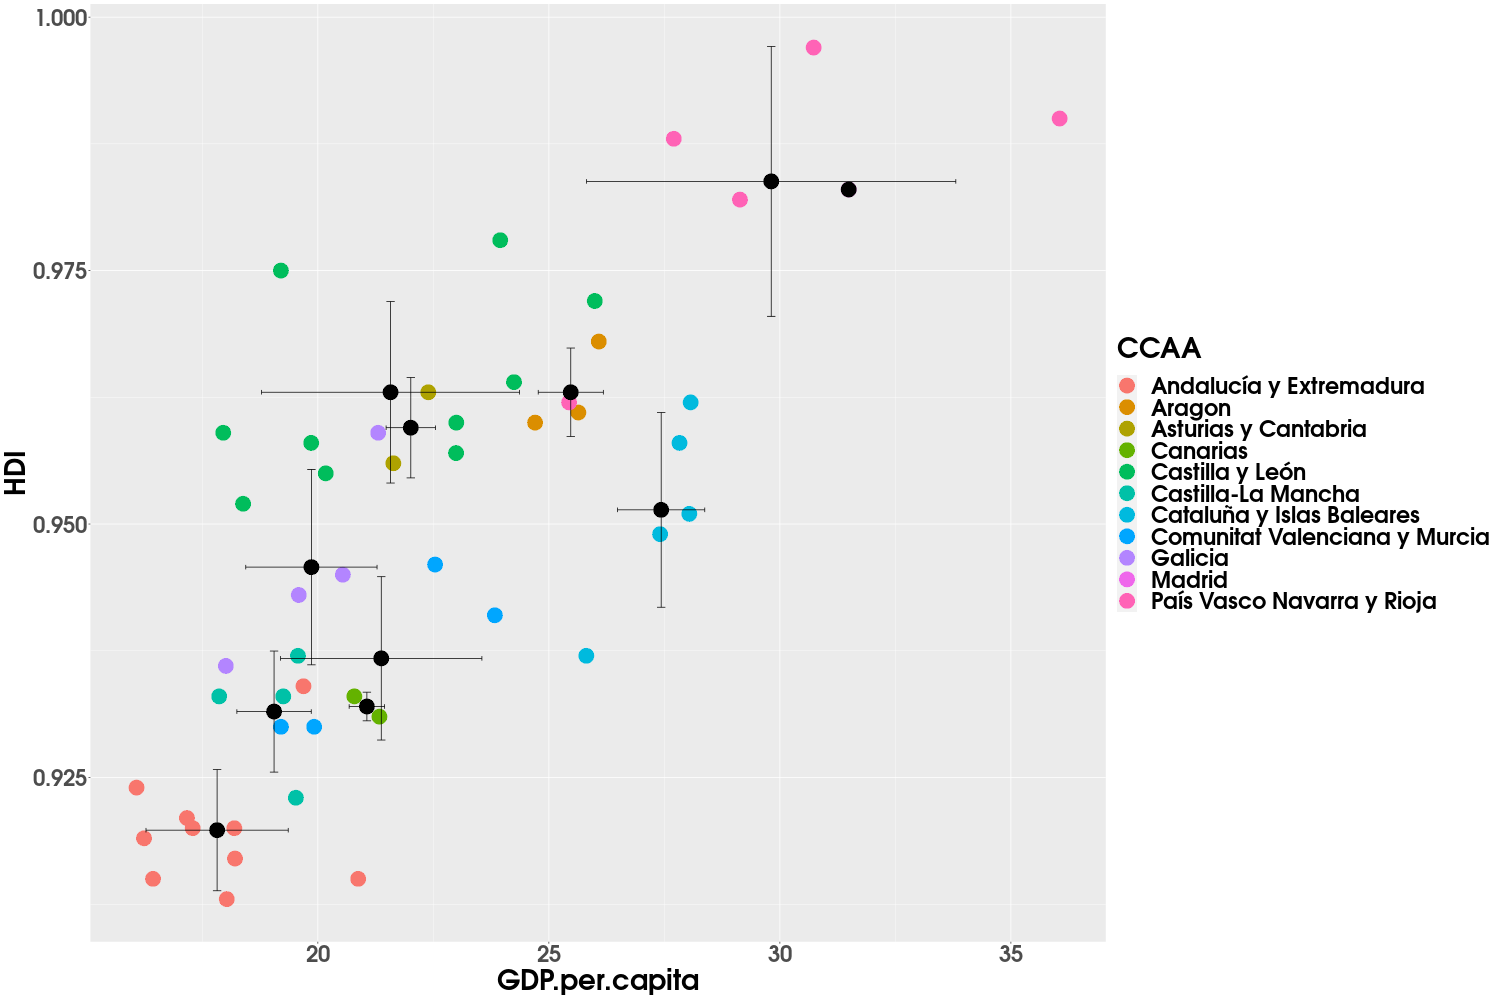

In [54]:
#Adding also vertical and horizontal error bars 
ggplot() + geom_point(data = mod_table, aes(x=mod_table[,2], y=mod_table[,4], color=CCAA),  size=10) + theme(text = element_text(family = "Calibri", size = 40, face = "bold")) + geom_point(data=table_mean_sd, x=table_mean_sd[,2], y=table_mean_sd[,3], size=10) +  
    geom_errorbar(data = table_mean_sd, aes(x = table_mean_sd[,2], ymin = table_mean_sd[,3] - table_mean_sd[,5], ymax = table_mean_sd[,3] + table_mean_sd[,5])) + 
    geom_errorbarh(data = table_mean_sd, aes(y = table_mean_sd[,3], xmin = table_mean_sd[,2] - table_mean_sd[,4], xmax = table_mean_sd[,2] + table_mean_sd[,4])) +
 labs(x = "GDP.per.capita",y = "HDI")

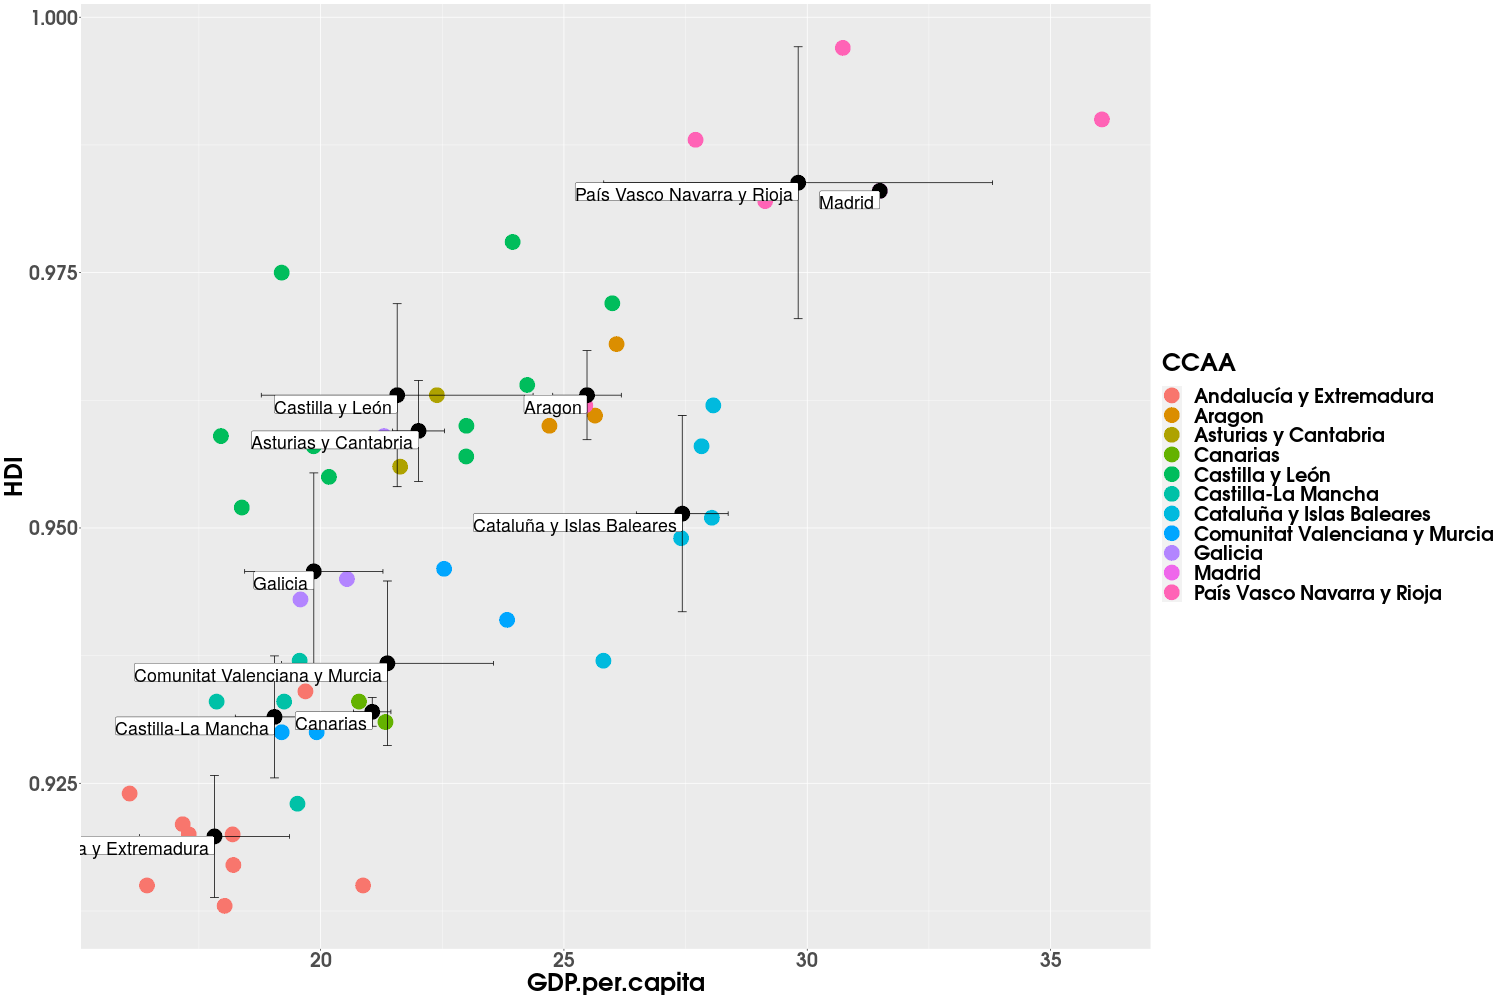

In [55]:
ggplot() + geom_point(data = mod_table, aes(x=mod_table[,2], y=mod_table[,4], color=CCAA),  size=10) + theme(text = element_text(family = "Calibri", size = 35, face = "bold")) + 
    geom_point(data=table_mean_sd, x=table_mean_sd[,2], y=table_mean_sd[,3], size=10) +  
    geom_errorbar(data = table_mean_sd, aes(x = table_mean_sd[,2], ymin = table_mean_sd[,3] - table_mean_sd[,5], ymax = table_mean_sd[,3] + table_mean_sd[,5])) + 
    geom_errorbarh(data = table_mean_sd, aes(y = table_mean_sd[,3], xmin = table_mean_sd[,2] - table_mean_sd[,4], xmax = table_mean_sd[,2] + table_mean_sd[,4])) +
    geom_label(data=table_mean_sd, x=table_mean_sd[,2], y=table_mean_sd[,3], label = table_mean_sd[,1], size = 9, hjust=1, vjust=1) + labs(x = "GDP.per.capita",y = "HDI")
 
